In [2]:
from pcdet.datasets import build_dataloader
from pcdet.config import cfg, cfg_from_yaml_file
from pcdet.utils import common_utils
from pathlib import Path

cfg_from_yaml_file('cfgs/kitti_models/sphoxelnet_simple.yaml', cfg)
logger = common_utils.create_logger()

train_set, train_loader, train_sampler = build_dataloader(
        dataset_cfg=cfg.DATA_CONFIG,
        class_names=cfg.CLASS_NAMES,
        batch_size=1,
        dist=False, workers=1,
        logger=logger,
        training=True,
        merge_all_iters_to_one_epoch=False,
        total_epochs=10
    )

2020-08-19 03:18:11,869   INFO  Database filter by min points Car: 14357 => 13532
2020-08-19 03:18:11,871   INFO  Database filter by min points Pedestrian: 2207 => 2168
2020-08-19 03:18:11,872   INFO  Database filter by min points Cyclist: 734 => 705
2020-08-19 03:18:11,892   INFO  Database filter by difficulty Car: 13532 => 10759
2020-08-19 03:18:11,896   INFO  Database filter by difficulty Pedestrian: 2168 => 2075
2020-08-19 03:18:11,898   INFO  Database filter by difficulty Cyclist: 705 => 581
2020-08-19 03:18:11,922   INFO  Loading KITTI dataset
2020-08-19 03:18:12,048   INFO  Total samples for KITTI dataset: 3712


voxelmap_shape =  (40, 512, 512)


In [3]:
import numpy as np


def draw_box(image, x, y, z, w, h, l, r, c):
    """ no rotate """
    # only car 


        
def vis_coords(coords, bev_range, gt_boxes=None):
    """
    coords: tensor of shape [N, 4]
        b, z, y, x
    bev_range : [2], (max_x, max_y)
    gt_boxes : [M, 8],  x , y, z, w h l r, class ?
    """
    image = np.zeros(shape=bev_range)
    for i in range(coords.shape[0]):
        b, z, y, x = coords[i]
        image[x,y] = 1
        
    if gt_boxes is not None:
        for i in range(gt_boxes.shape[0]):
            x, y, z, w, h, l, r, c = gt_boxes[i]
            draw_box(image, x, y, z, w, h, l, r, c)

    return image

    

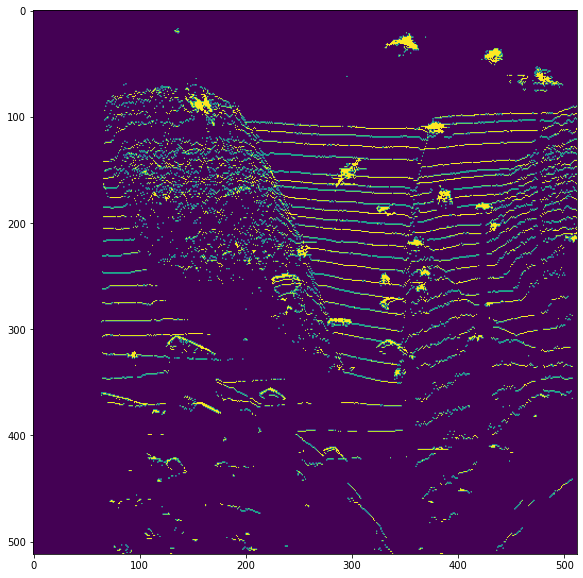

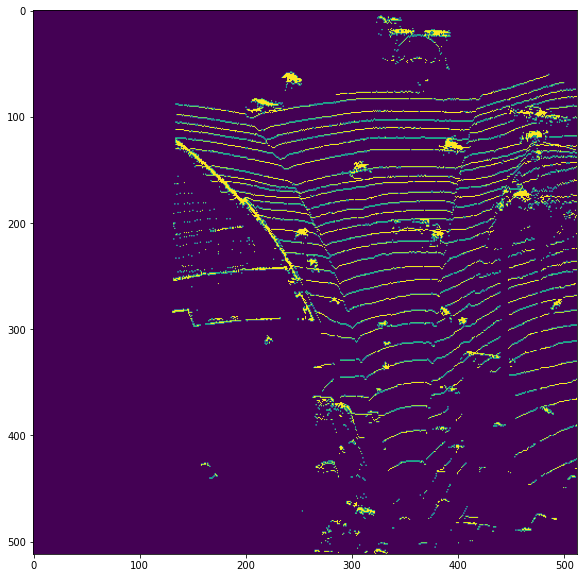

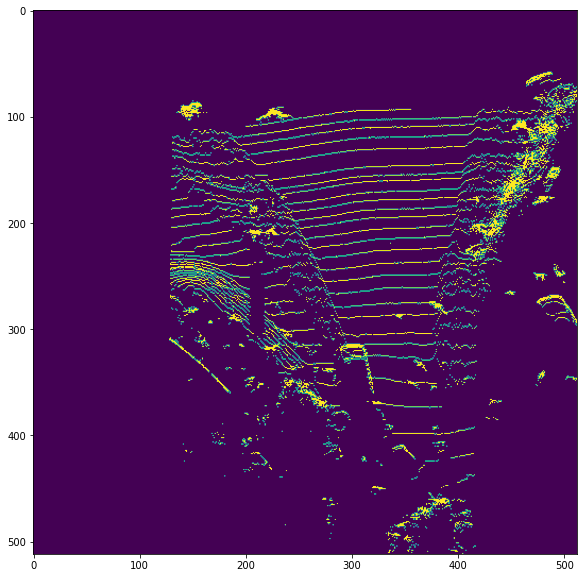

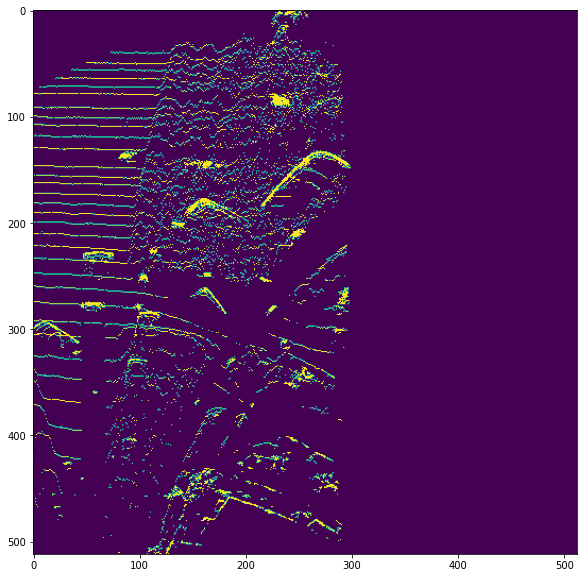

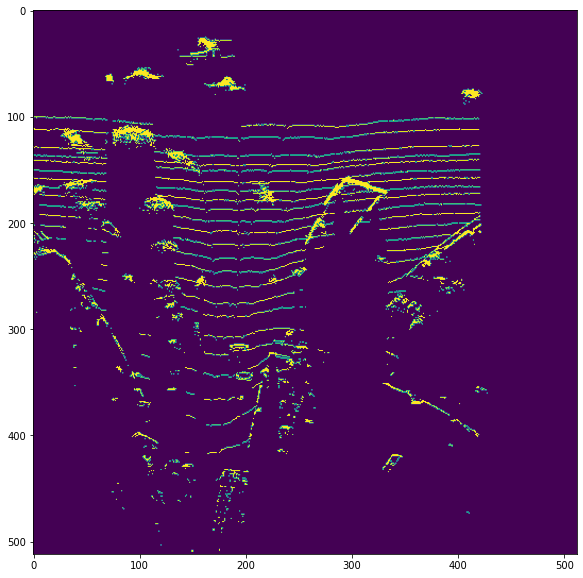

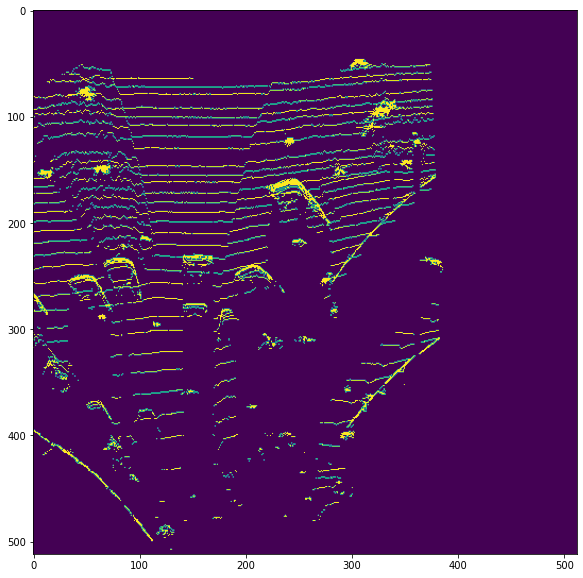

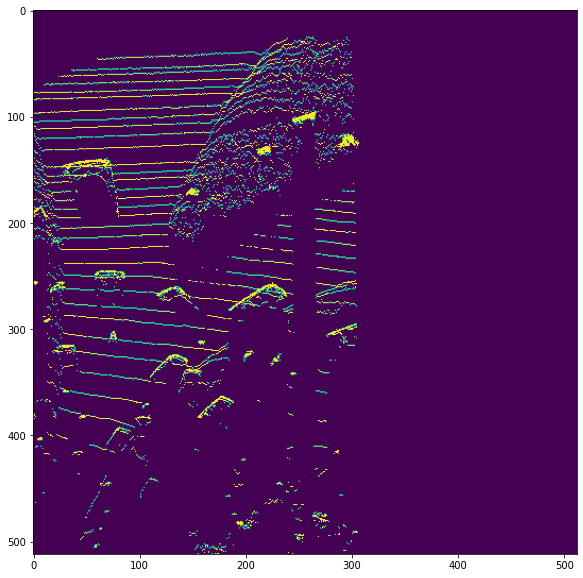

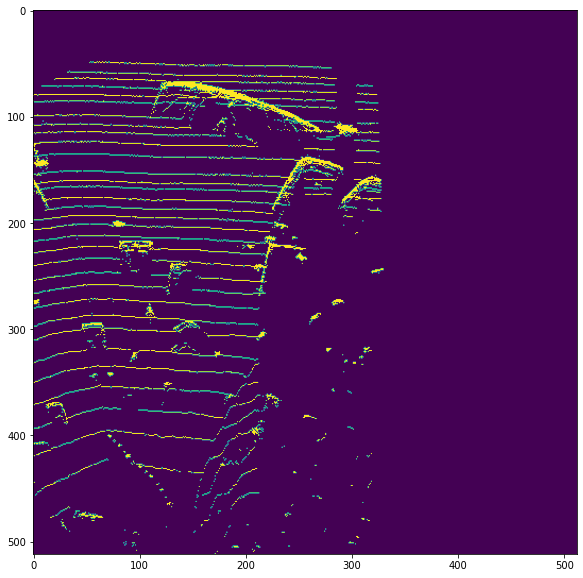

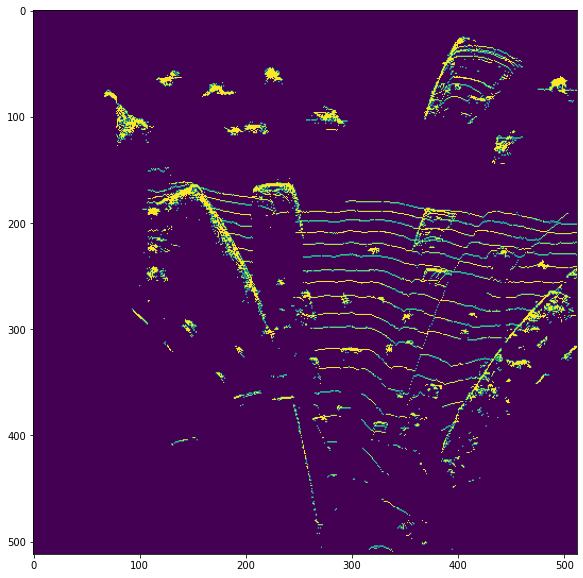

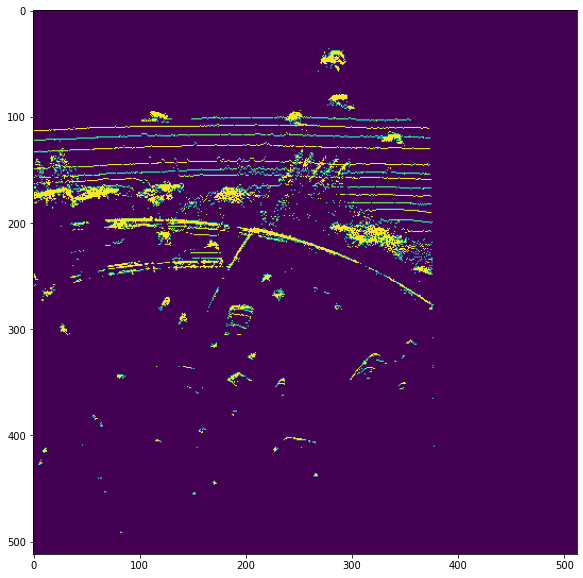

In [28]:

import matplotlib.pyplot as plt
dataloader_iter = iter(train_loader)
for i in range(10):
    batch = next(dataloader_iter)
    coords = batch['voxel_coordsb']
    plt.figure(figsize=(10,10))
    plt.imshow(vis_coords(coords, [512,512]))

In [29]:
coords

array([[  0,   6, 309, 340],
       [  0,   6, 310, 339],
       [  0,   6, 311, 338],
       ...,
       [  0,  31, 353, 102],
       [  0,  31, 354, 103],
       [  0,  31, 355, 103]], dtype=int32)

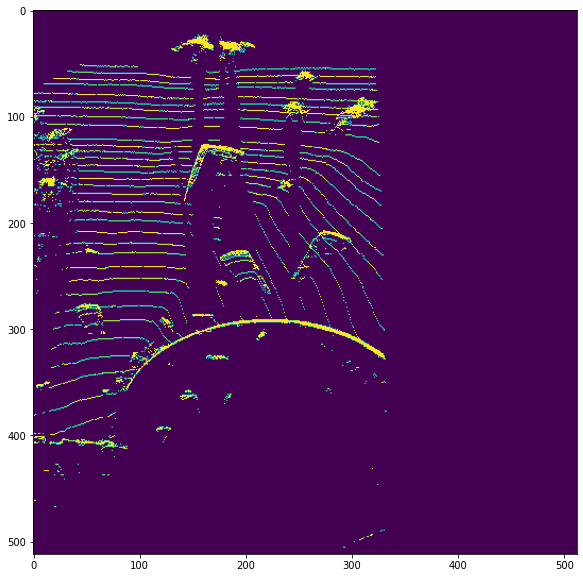

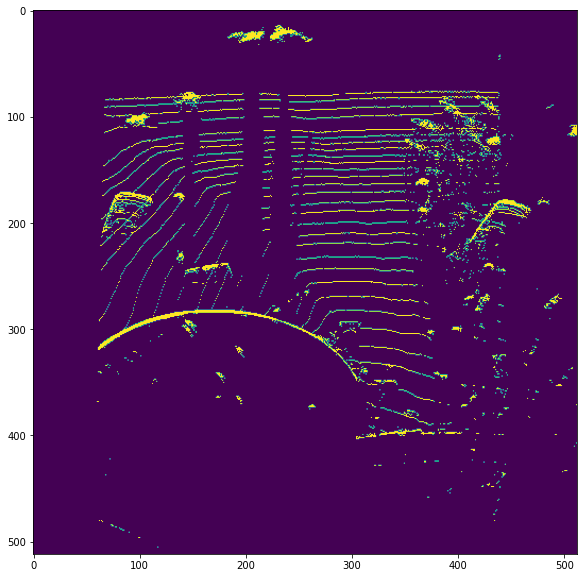

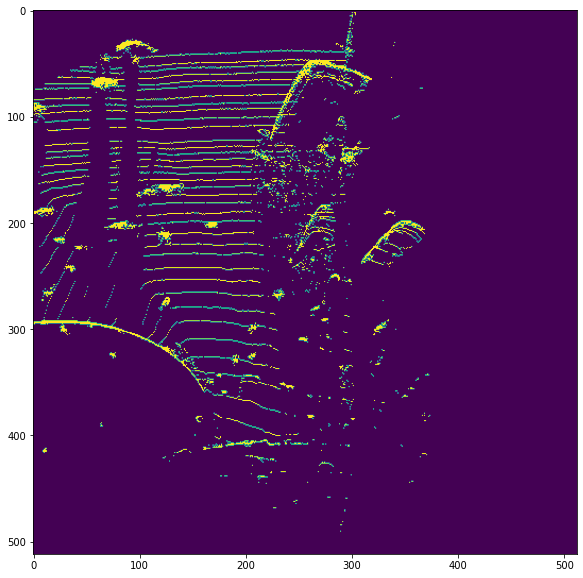

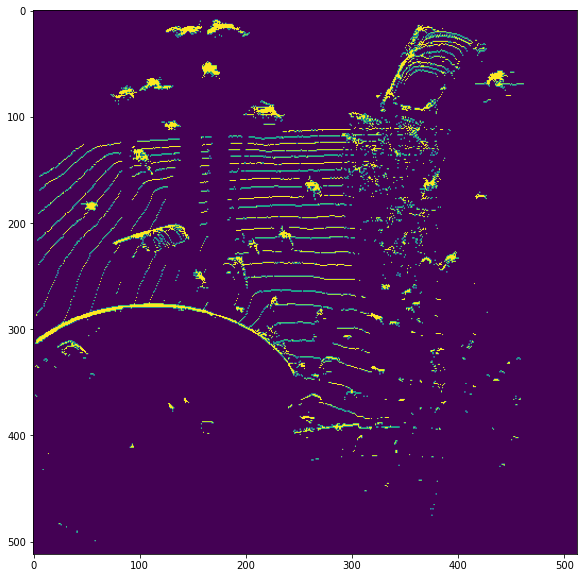

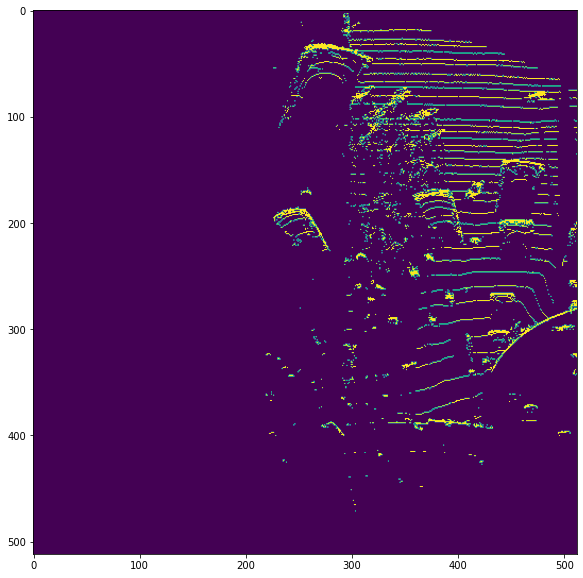

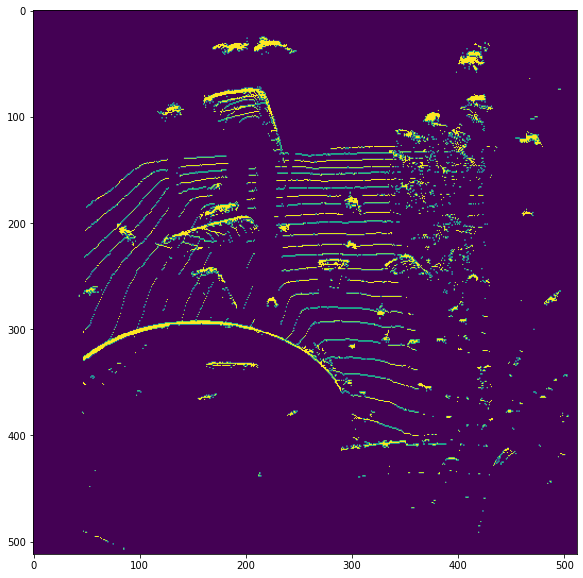

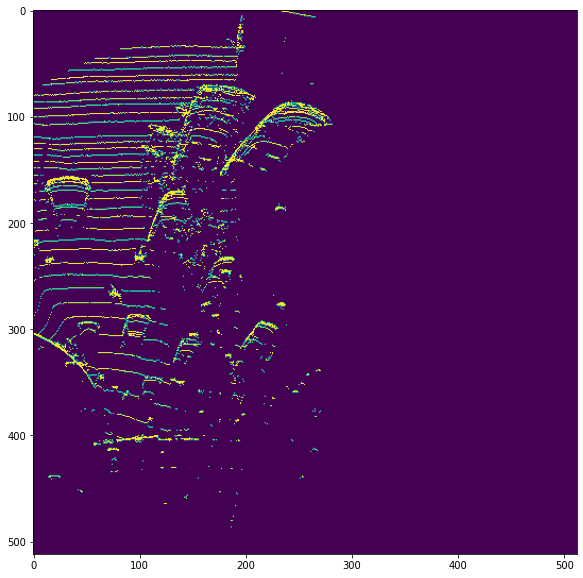

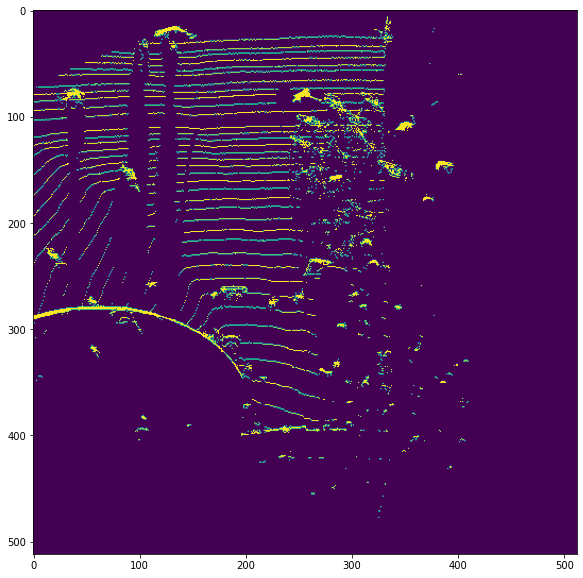

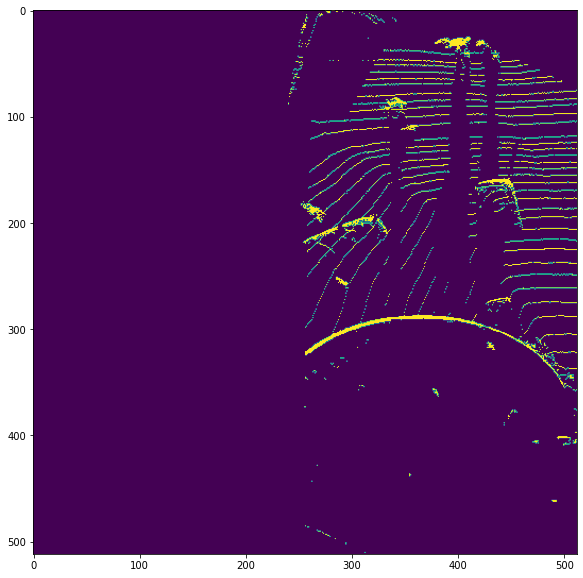

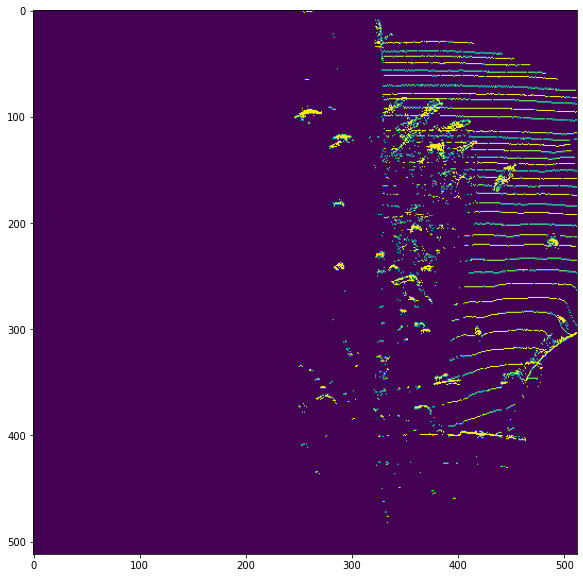

In [39]:
import matplotlib.pyplot as plt
for i in range(10):
    coords = train_set[40]['voxel_coords']
    coords = np.concatenate((np.zeros((coords.shape[0], 1)), coords), axis=1).astype(int)
    plt.figure(figsize=(10,10))
    plt.imshow(vis_coords(coords, [512,512]))


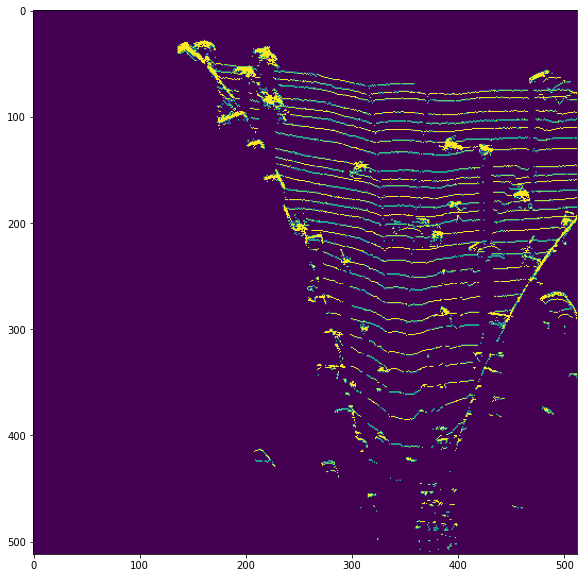